In [32]:
# Import dependencies
import pandas as pd
import numpy as np
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

In [2]:
# Read in CSV
raw_data_df = pd.read_csv("data.csv")
raw_data_df.head()

,Unnamed: 0,merchant-name,merchant-description,physical-address,zip-code,latitude,longitude,country,state,vintage,price,bottle-size,link
0,0,B-21,Wine merchant established in 1948. ex. sales tax,"43380 US Highway 19 North, Tarpon Springs, FL ...",34689,28.165844,-82.741050,USA,FL,2018,19.98,Half Bottle (375ml),https://www.wine-searcher.com/redirect?from_ty...
1,1,Saratoga Wine Exchange,Retail wine store located in upstate New York....,"43 Round Lake Road, Ballston Lake, NY 12019",12019,42.934360,-73.812305,USA,NY,2018,23.94,Half Bottle (375ml),https://www.wine-searcher.com/redirect?from_ty...
2,2,Hi-Time Wine Cellars,"Retail wine, beer and spirits shop specializin...","250 Ogle Street, Costa Mesa, CA 92627",92627,33.632900,-117.918368,USA,CA,2018,23.99,Half Bottle (375ml),https://www.wine-searcher.com/redirect?from_ty...
3,3,Woods Wholesale Wine,Michigan's #1 Wine & Spirits Retailer. ex. sal...,"20787 Mack Avenue, Grosse Pointe Woods, MI 48236",48236,42.445356,-82.906895,USA,MI,2018,24.94,Half Bottle (375ml),https://www.wine-searcher.com/redirect?from_ty...
4,4,K&L Wine Merchants,Wine merchant established in 1976. ex. sales tax,"3005 El Camino Real, Redwood City, CA 94061",94061,37.468422,-122.210258,USA,CA,2018,24.95,Half Bottle (375ml),https://www.wine-searcher.com/redirect?from_ty...


In [23]:
raw_data_slimmed_df = raw_data_df[["state","bottle-size","price"]]
raw_data_slimmed2_df = raw_data_slimmed_df.loc[raw_data_slimmed_df["bottle-size"]=="Bottle (750ml)"]
raw_data_agg_df = raw_data_slimmed2_df.groupby(by="state").agg(["mean","median"]).droplevel(0, axis=1)
raw_data_agg_df.reset_index(level=0, inplace=True)
raw_data_agg_df

,state,mean,median
0,CA,88.490000,49.995
1,CT,48.323333,49.990
2,DC,75.660000,59.990
3,FL,44.841429,42.990
4,IL,45.990000,47.990
5,LA,44.970000,44.970
6,MA,48.737500,49.985
7,MI,55.342000,54.990
8,MO,48.990000,48.990
9,NJ,49.274286,45.980


In [14]:
states = "Resources/cb_2018_us_state_20m/cb_2018_us_state_20m.shp"
map_df = gpd.read_file(states)
map_df.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


<AxesSubplot:>

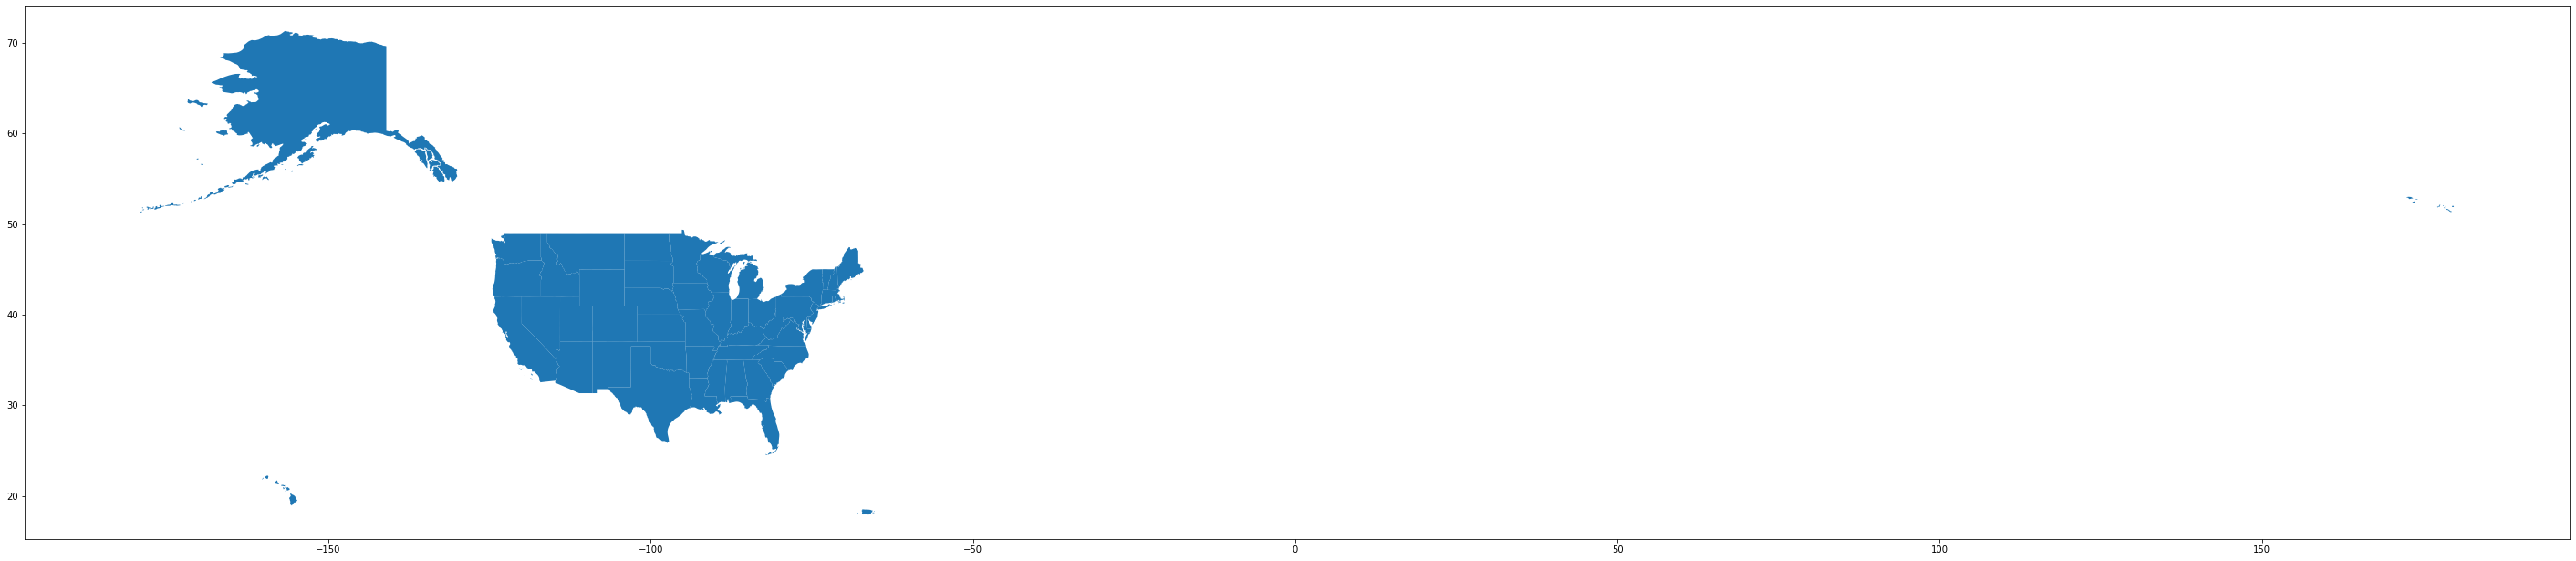

In [9]:
plt.rcParams['figure.figsize'] = [50, 70] #height, width
map_df.plot()

In [33]:
raw_map_merge_df = pd.merge(left=raw_data_agg_df, right=map_df, how="outer", left_on="state", right_on="STUSPS")
type(raw_map_merge_df)

pandas.core.frame.DataFrame

In [34]:
raw_map_merge_df = GeoDataFrame(raw_map_merge_df)
type(raw_map_merge_df)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

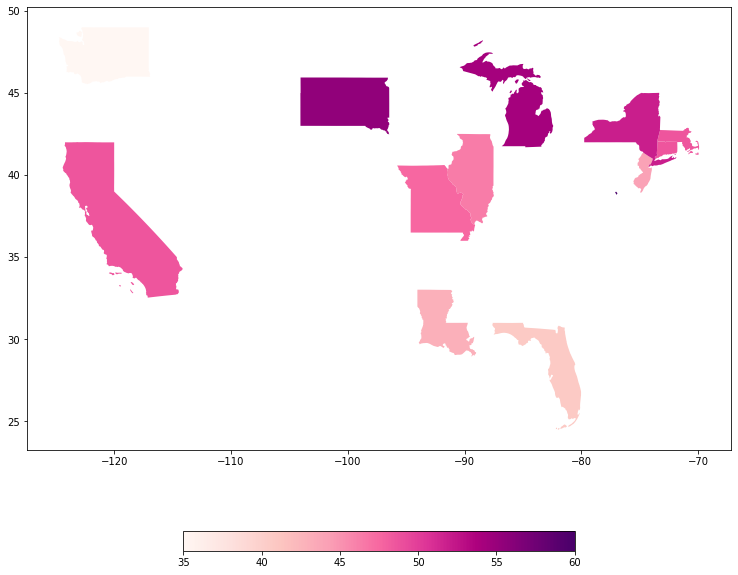

In [40]:
# set the value column that will be visualised
variable = "median"

# set the range for the choropleth values
vmin, vmax = 35, 60

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, 1, figsize=(30, 10))

# remove the axis
# ax.axis('off')

# add a title and annotation
# ax.set_title('# of Cities per each Region', fontdict={'fontsize': '25', 'fontweight' : '3'})
# ax.annotate('Source: Wikipedia - https://en.wikipedia.org/wiki/Provinces_of_Indonesia', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='RdPu', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# add the colorbar to the figure
fig.colorbar(sm, orientation="horizontal", fraction=0.036)

# create map
raw_map_merge_df.plot(column=variable, cmap='RdPu', linewidth=0.8, ax=ax)